### Name: Nirupama Laishram
### Corizo Major Project: Wine quality prediction data analysis

In [20]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-quality/winequalityN.csv


In [21]:
df = pd.read_csv("/kaggle/input/wine-quality/winequalityN.csv")

In [22]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [23]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [27]:
df["fixed acidity"].value_counts()

6.80     354
6.60     326
6.40     305
7.00     282
6.90     279
        ... 
14.30      1
15.90      1
13.80      1
14.20      1
6.45       1
Name: fixed acidity, Length: 106, dtype: int64

In [28]:
## df["fixed acidity"].fillna(mean,inplace=True)

In [29]:
mean = df["fixed acidity"].mean()
df["fixed acidity"].fillna(mean,inplace=True)
df["fixed acidity"].isnull().sum()

0

In [30]:
mean2 = df["volatile acidity"].mean()
df["volatile acidity"].fillna(mean,inplace=True)
df["volatile acidity"].isnull().sum()

0

In [31]:
df["citric acid"].value_counts()

0.30    337
0.28    301
0.32    289
0.49    283
0.26    257
       ... 
1.66      1
0.75      1
0.86      1
0.99      1
1.23      1
Name: citric acid, Length: 89, dtype: int64

In [32]:
mean3 = df["citric acid"].mean()
df["citric acid"].fillna(mean,inplace=True)
df["citric acid"].isnull().sum()

0

In [33]:
df["residual sugar"].value_counts()

2.00     235
1.80     228
1.60     223
1.40     219
1.20     195
        ... 
14.15      1
14.05      1
3.15       1
8.95       1
20.30      1
Name: residual sugar, Length: 316, dtype: int64

In [34]:
mean4 = df["residual sugar"].mean()
df["residual sugar"].fillna(mean,inplace=True)
df["residual sugar"].isnull().sum()

0

In [35]:
mean4 = df["chlorides"].mean()
df["chlorides"].fillna(mean,inplace=True)
df["chlorides"].isnull().sum()

0

In [36]:

mean5 = df["pH"].mean()
df["pH"].fillna(mean,inplace=True)
df["pH"].isnull().sum()

0

In [37]:
mean6 = df["sulphates"].mean()
df["sulphates"].fillna(mean,inplace=True)
df["sulphates"].isnull().sum()

0

In [38]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Let's Visualize the Data

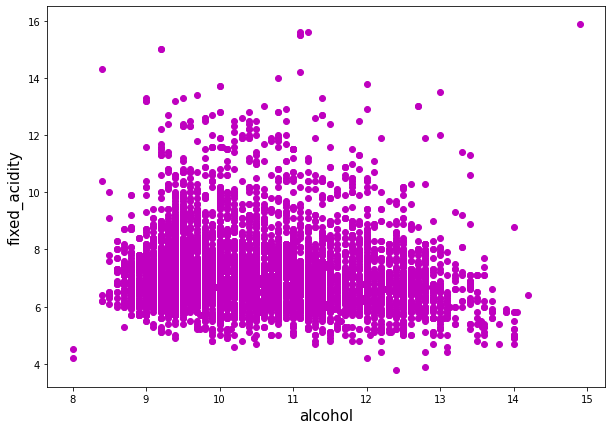

In [39]:
plt.figure(figsize=(10,7))
plt.scatter(x="alcohol",y="fixed acidity",data =df,marker= 'o',c="m")
plt.xlabel("alcohol",fontsize=15)
plt.ylabel("fixed_acidity",fontsize=15)
plt.show()

[]

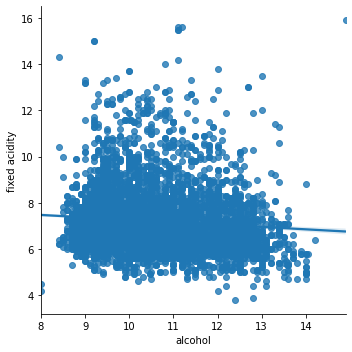

In [40]:
sns.lmplot(x="alcohol",y="fixed acidity",data=df)
plt.plot()

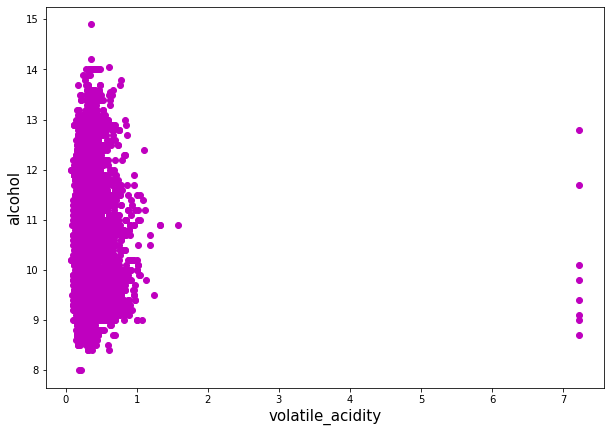

In [41]:
plt.figure(figsize=(10,7))
plt.scatter(x="volatile acidity",y="alcohol",data =df,marker= 'o',c="m")
plt.xlabel("volatile_acidity",fontsize=15)
plt.ylabel("alcohol",fontsize=15)
plt.show()

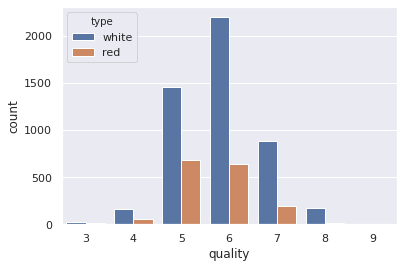

In [42]:
sns.set(style="darkgrid")
sns.countplot(df["quality"],hue="type",data=df)
plt.show()

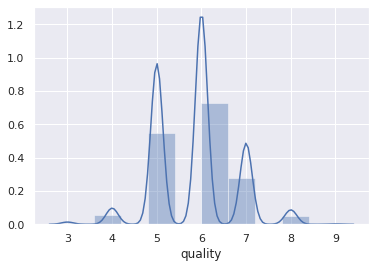

In [43]:
sns.set()
sns.distplot(df["quality"],bins=10)
plt.show()

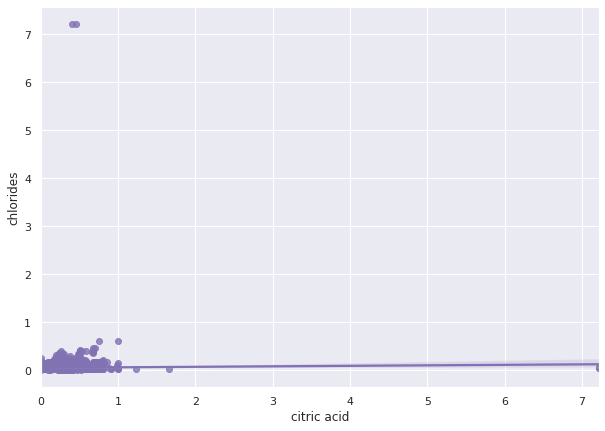

In [44]:
plt.figure(figsize=(10,7))
sns.regplot(x="citric acid",y="chlorides",data =df,marker= 'o',color="m")
plt.show()

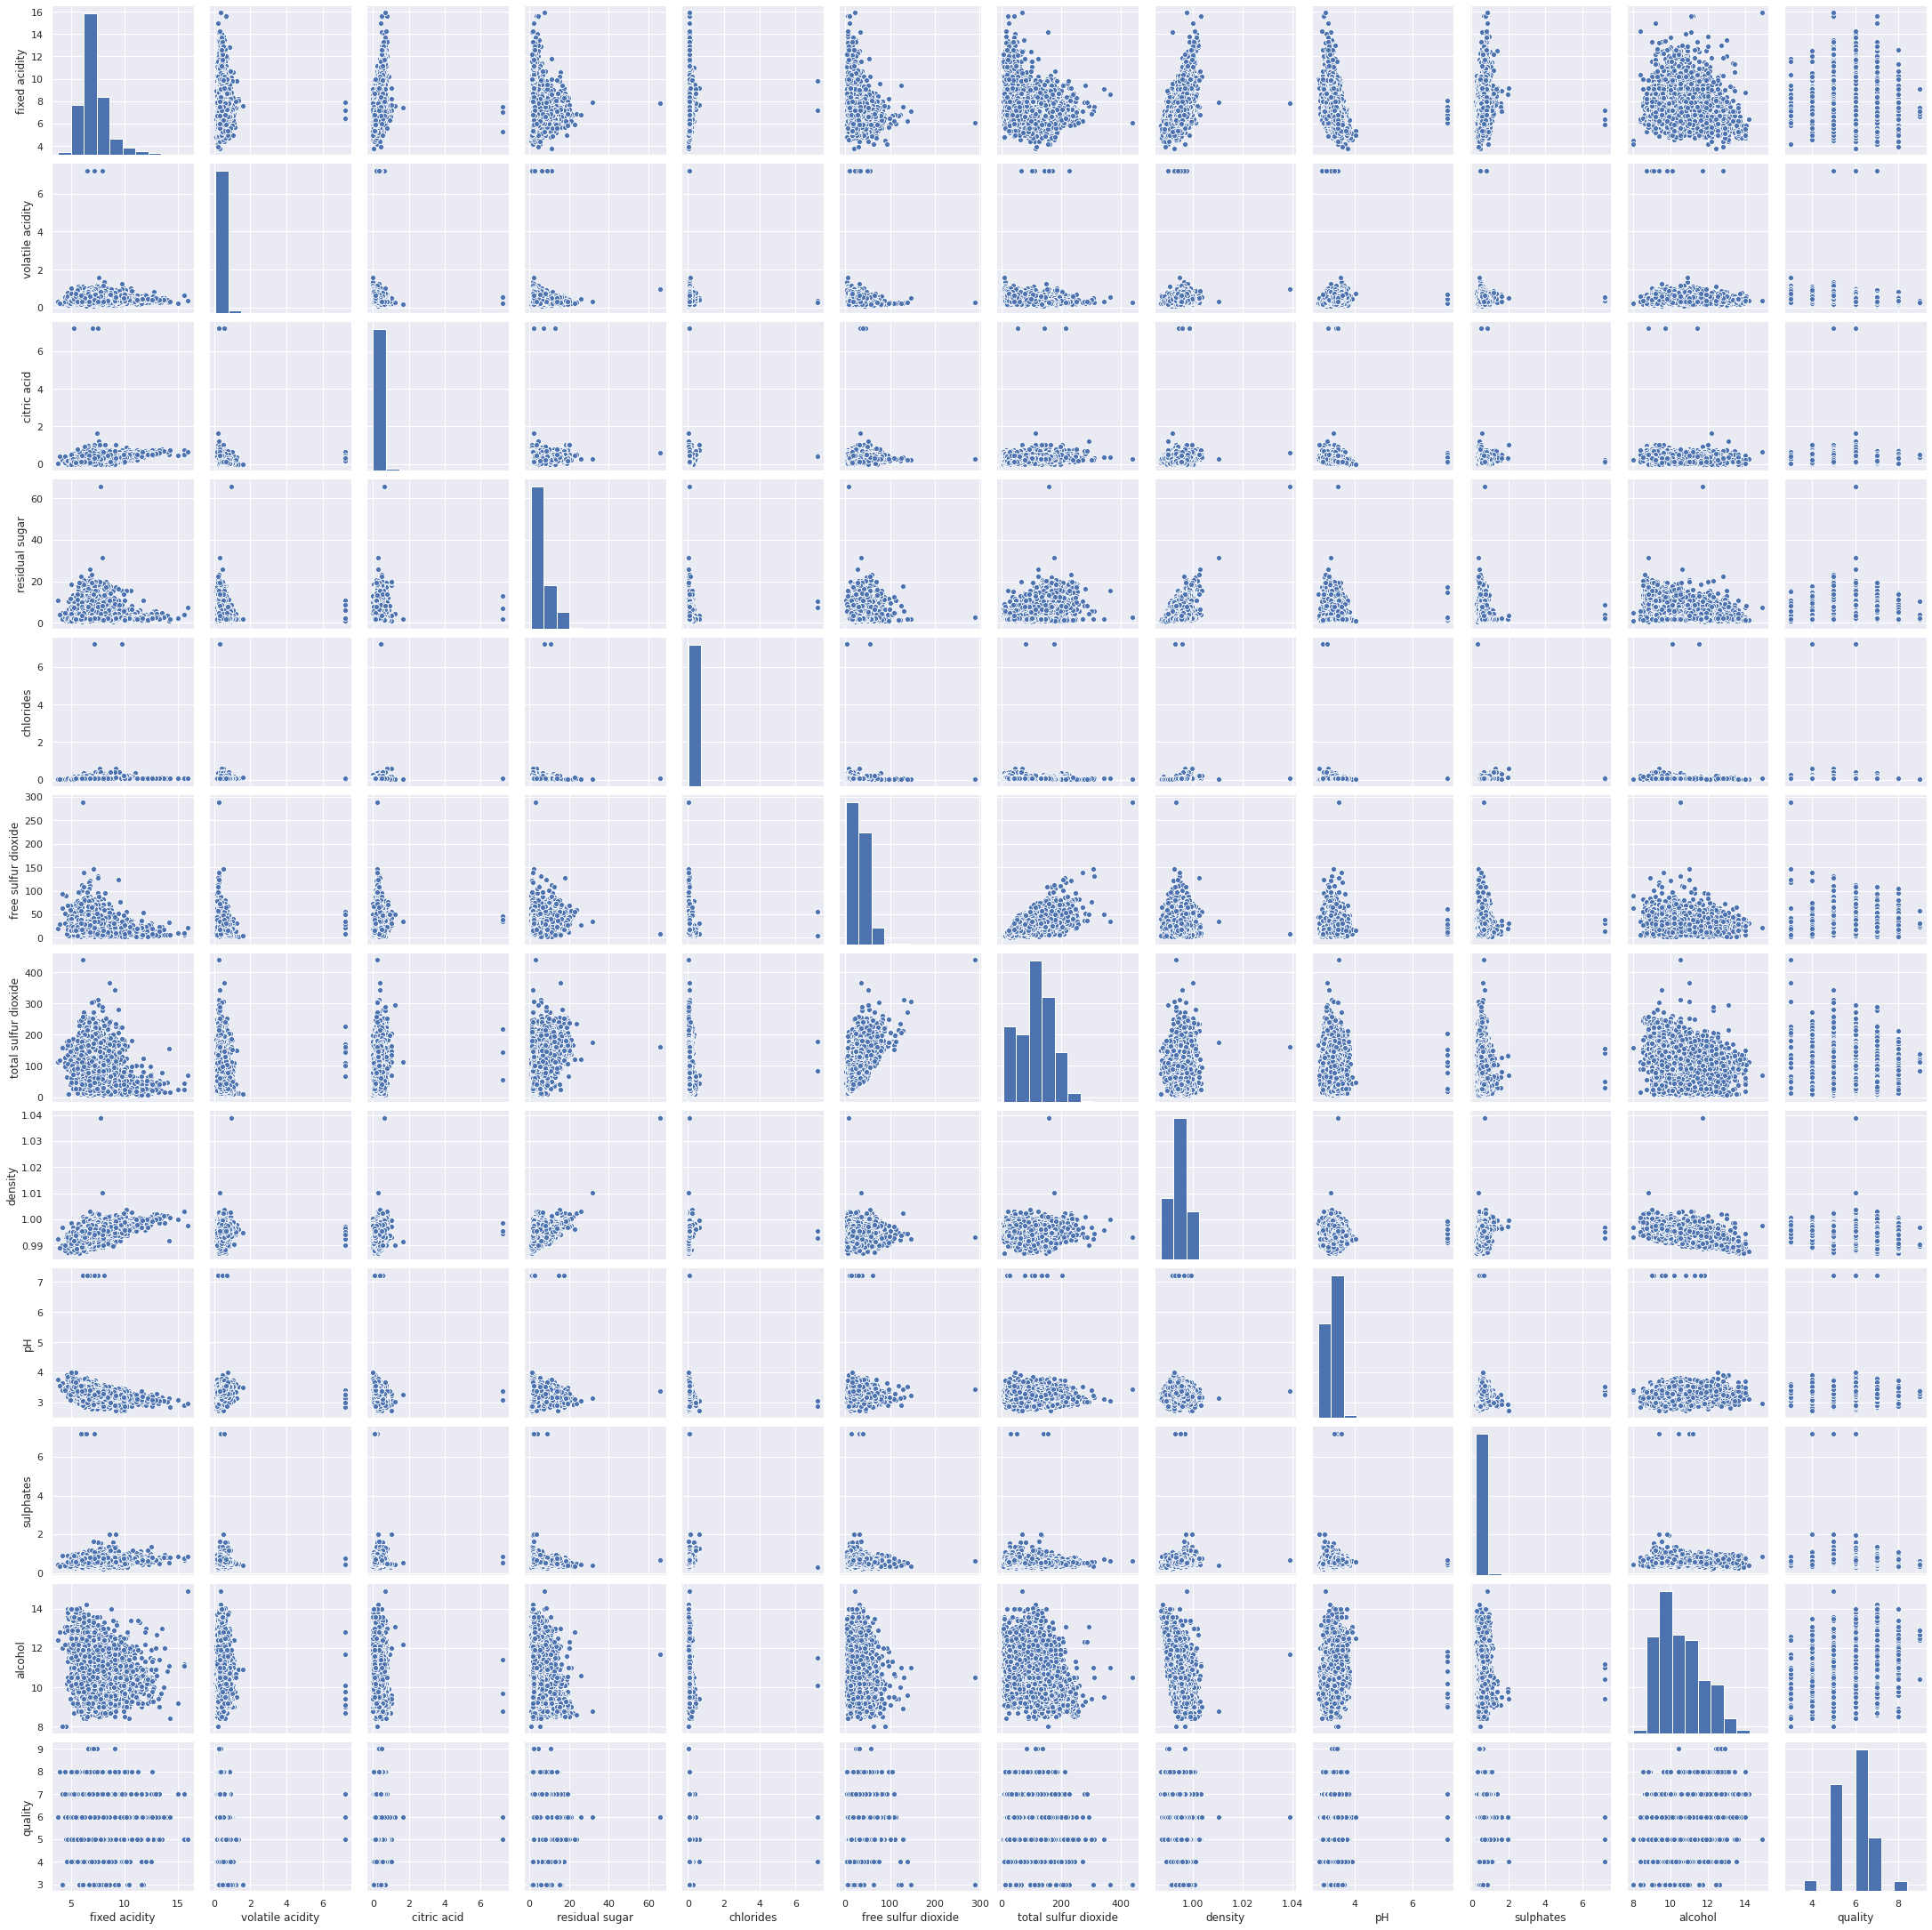

In [45]:
sns.set()
sns.pairplot(df)
plt.show()

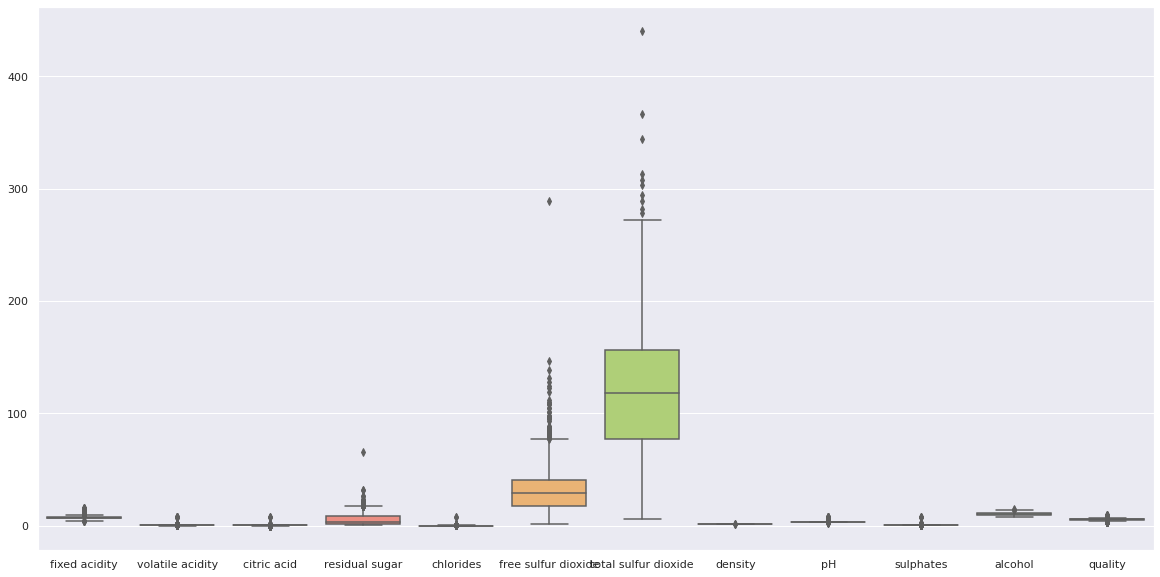

In [46]:
sns.set()
plt.figure(figsize=(20,10))
sns.boxplot(data=df,palette="Set3")
plt.show()

 # We can see that there are Some outliers.So now let's remove those Outliers

In [47]:
lower_limit = df["free sulfur dioxide"].mean() - 3*df["free sulfur dioxide"].std()
upper_limit = df["free sulfur dioxide"].mean() + 3*df["free sulfur dioxide"].std()


In [48]:
print(lower_limit,upper_limit)

-22.722879937833156 83.77351869418224


In [49]:
df2 = df[(df["free sulfur dioxide"] > lower_limit) & (df["free sulfur dioxide"] < upper_limit)]

In [50]:
df.shape[0] - df2.shape[0]

36

In [51]:
lower_limit = df2['total sulfur dioxide'].mean() - 3*df2['total sulfur dioxide'].std()
upper_limit = df2['total sulfur dioxide'].mean() + 3*df2['total sulfur dioxide'].std()
print(lower_limit,upper_limit)

-53.15243132839596 283.65436601342924


In [52]:
df3 = df2[(df2['total sulfur dioxide'] > lower_limit) & (df2['total sulfur dioxide'] < upper_limit)]
df3.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [53]:
df2.shape[0] - df3.shape[0]

5

In [54]:
lower_limit = df3['residual sugar'].mean() - 3*df3['residual sugar'].std()
upper_limit = df3['residual sugar'].mean() + 3*df3['residual sugar'].std()
print(lower_limit,upper_limit)

-8.835623392315494 19.713297852856098


In [55]:
df4 = df3[(df3['residual sugar'] > lower_limit) & (df3['residual sugar'] < upper_limit)]
df4.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [56]:
df3.shape[0] - df4.shape[0]

26

In [57]:
df4.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [58]:
dummies = pd.get_dummies(df4["type"],drop_first=True)

In [59]:
df4 = pd.concat([df4,dummies],axis=1)

In [60]:
df4.drop("type",axis=1,inplace=True)

In [61]:
df4.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1


In [62]:
df4.quality.value_counts()

6    2806
5    2116
7    1075
4     214
8     189
3      25
9       5
Name: quality, dtype: int64

# Now lets Change the Categorical 'String' Variables into Numerical Variables

In [63]:
quaity_mapping = { 3 : "Low",4 : "Low",5: "Medium",6 : "Medium",7: "Medium",8 : "High",9 : "High"}
df4["quality"] =  df4["quality"].map(quaity_mapping)

In [64]:
df4.quality.value_counts()

Medium    5997
Low        239
High       194
Name: quality, dtype: int64

In [65]:
df4.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,Medium,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,Medium,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Medium,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Medium,1
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,Medium,1


In [66]:
mapping_quality = {"Low" : 0,"Medium": 1,"High" : 2}
df4["quality"] =  df4["quality"].map(mapping_quality)

In [67]:
df4.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1,1


# Lets Select the best Features for our Model

In [68]:
x = df4.drop("quality",axis=True)
y = df4["quality"]

In [69]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [70]:
print(model.feature_importances_)

[0.08298615 0.10769398 0.08489758 0.08938038 0.0866086  0.10439389
 0.08702587 0.08587714 0.08252447 0.08694624 0.09416186 0.00750384]


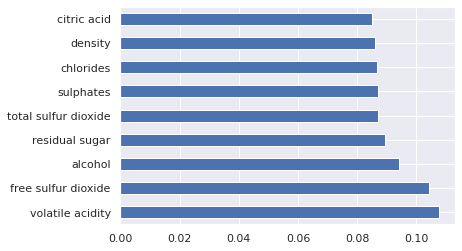

In [71]:
feat_importances = pd.Series(model.feature_importances_,index =x.columns)
feat_importances.nlargest(9).plot(kind="barh")
plt.show()

# Now Let's select the best model for our Dataset

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [73]:
model_params  = {
    "svm" : {
        "model":SVC(gamma="auto"),
        "params":{
            'C' : [1,10,20],
            'kernel':["rbf"]
        }
    },
    
    "decision_tree":{
        "model": DecisionTreeClassifier(),
        "params":{
            'criterion':["entropy","gini"],
            "max_depth":[5,8,9]
        }
    },
    
    "random_forest":{
        "model": RandomForestClassifier(),
        "params":{
            "n_estimators":[1,5,10],
            "max_depth":[5,8,9]
        }
    },
    "naive_bayes":{
        "model": GaussianNB(),
        "params":{}
    },
    
    'logistic_regression' : {
        'model' : LogisticRegression(solver='liblinear',multi_class = 'auto'),
        'params': {
            "C" : [1,5,10]
        }
    }
    
}

In [74]:
score=[]
for model_name,mp in model_params.items():
    clf = GridSearchCV(mp["model"],mp["params"],cv=8,return_train_score=False)
    clf.fit(x,y)
    score.append({
        "Model" : model_name,
        "Best_Score": clf.best_score_,
        "Best_Params": clf.best_params_
    })

In [75]:
df5 = pd.DataFrame(score,columns=["Model","Best_Score","Best_Params"])

In [76]:
df5

,Model,Best_Score,Best_Params
0,svm,0.932193,"{'C': 1, 'kernel': 'rbf'}"
1,decision_tree,0.923172,"{'criterion': 'entropy', 'max_depth': 5}"
2,random_forest,0.931882,"{'max_depth': 5, 'n_estimators': 5}"
3,naive_bayes,0.636770,{}
4,logistic_regression,0.932348,{'C': 1}


# So we can see that, we are getting 93% accuracy for SVM & Random Forest

In [77]:
from sklearn.model_selection import cross_val_score
clf_svm = SVC(kernel="rbf",C=1)
scores = cross_val_score(clf_svm,x,y,cv=8,scoring="accuracy")

In [78]:
scores

array([0.93283582, 0.93283582, 0.93283582, 0.93283582, 0.93283582,
       0.93159204, 0.93275218, 0.93275218])

In [79]:
scores.mean()

0.9326594378667064

# So we are getting 93% Accuracy for predicting the Quality of Wine

In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [81]:
clf_svm1 = SVC(kernel="rbf",C=1)
clf_svm1.fit(x_train,y_train)

SVC(C=1)

In [82]:
y_pred = clf_svm1.predict(x_test)

In [83]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)

In [84]:
accuracy

0.9339035769828927

# Now Lets see the Real value and Predicted Value

In [85]:
accuracy_dataframe = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})

In [86]:
accuracy_dataframe.head()

,y_test,y_pred
1935,1,1
1106,2,1
2932,1,1
743,1,1
2230,1,1
